In [1]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from tqdm import tqdm

from PIL import Image

from deeplab3.config.defaults import get_cfg_defaults
from deeplab3.dataloaders.utils import sample_distribution

from deeplab3.dataloaders.datasets.cityscapes import CityscapesSegmentation
from deeplab3.dataloaders.datasets.coco import COCOSegmentation
from deeplab3.dataloaders.datasets.sunrgbd import RGBDSegmentation

from deeplab3.dataloaders.SampleLoader import SampleLoader

In [2]:
def plot_distribution(a_list, bins, percent=False):
    ax = plt.figure()
    bin_middle = np.array([(bins[x] + bins[x + 1]) / 2.0 for x in range(len(bins) - 1)])
    for a in a_list:
        n = np.histogram(a, bins=bins)[0]
        if percent:
            n = n / np.sum(n)
        # y = scipy.stats.norm.pdf(b, 0, 1)
        plt.plot(bin_middle[np.nonzero(n)], n[np.nonzero(n)])

    return ax

Load configuation files for all datasets

In [24]:
sunrgbd_rgbd = get_cfg_defaults()
sunrgbd_rgbd.merge_from_file('../configs/sunrgbd.yaml')
sunrgbd_rgbd.merge_from_list(['DATASET.ROOT', '../datasets/SUNRGBD/'])

coco_synth = get_cfg_defaults()
coco_synth.merge_from_file('../configs/coco_rgbd.yaml')
coco_synth.merge_from_list(['DATASET.ROOT', '../datasets/coco/'])

# Coarse labels not available for test set
city_rgbd = get_cfg_defaults()
city_rgbd.merge_from_file('../configs/cityscapes_rgbd.yaml')
city_rgbd.merge_from_list(['DATASET.ROOT', '../datasets/cityscapes/']) #, 'DATASET.CITYSCAPES.GT_MODE', 'gtFine'])

city_synth = get_cfg_defaults()
city_synth.merge_from_file('../configs/cityscapes_synthetic_rgbd.yaml')
city_synth.merge_from_list(['DATASET.ROOT', '../datasets/cityscapes/', 'DATASET.CITYSCAPES.GT_MODE', 'gtFine'])

city_hha = get_cfg_defaults()
city_hha.merge_from_file('../configs/HHA/cityscapes_hha_midfusion.yaml')
city_hha.merge_from_list(['DATASET.ROOT', '../datasets/cityscapes/', 'DATASET.CITYSCAPES.GT_MODE', 'gtFine'])

In [27]:
city_rgbd_dist_val = sample_distribution(CityscapesSegmentation(city_rgbd, split='train_extra'), n=100)

Using RGB-D input


0it [00:00, ?it/s]

Found 19997 train_extra images


14it [00:06,  2.14it/s]


KeyboardInterrupt: 

## Measured (real) Depth Histograms

In [4]:
city_rgbd_dist_train = sample_distribution(CityscapesSegmentation(city_rgbd, split='train'), n=100)
city_rgbd_dist_val = sample_distribution(CityscapesSegmentation(city_rgbd, split='val'), n=100)
city_rgbd_dist_test = sample_distribution(CityscapesSegmentation(city_rgbd, split='test'), n=100)

0it [00:00, ?it/s]

Using RGB-D input
Found 2975 train images


100it [00:39,  2.50it/s]
0it [00:00, ?it/s]

Using RGB-D input
Found 500 val images


100it [00:37,  2.67it/s]
0it [00:00, ?it/s]

Using RGB-D input
Found 1525 test images


100it [00:37,  2.64it/s]


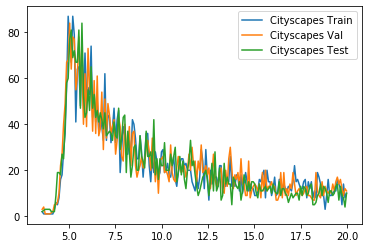

In [5]:
city_depth_samples = city_rgbd_dist_train['samples'][:, -1]
city_depth_samples_train = city_depth_samples[np.nonzero(city_depth_samples)]
city_depth_samples = city_rgbd_dist_val['samples'][:, -1]
city_depth_samples_val = city_depth_samples[np.nonzero(city_depth_samples)]
city_depth_samples = city_rgbd_dist_test['samples'][:, -1]
city_depth_samples_test = city_depth_samples[np.nonzero(city_depth_samples)]

bins = np.linspace(-1,20, num=256)
plot_distribution([city_depth_samples_train, 
                   city_depth_samples_val,
                   city_depth_samples_test], bins)
plt.legend(['Cityscapes Train', 'Cityscapes Val', 'Cityscapes Test'])
plt.show()

In [6]:
print("Cityscapes mean: {} \n \t std: {}".format(city_rgbd_dist_train['mean'], 
                                                 city_rgbd_dist_train['std']))

Cityscapes mean: [72.8352   82.6309   72.0542   26.777146] 
 	 std: [47.24967133 48.07478201 47.59000591 43.98546628]


In [7]:
sunrgbd_rgbd_dist_train = sample_distribution(RGBDSegmentation(sunrgbd_rgbd, split='train'), n=100)
sunrgbd_rgbd_dist_val = sample_distribution(RGBDSegmentation(sunrgbd_rgbd, split='val'), n=100)
sunrgbd_rgbd_dist_test = sample_distribution(RGBDSegmentation(sunrgbd_rgbd, split='test'), n=100)

loading annotations into memory...


2it [00:00, 13.91it/s]

Done (t=0.22s)
creating index...
index created!
Using RGB-D input


100it [00:07, 13.06it/s]
0it [00:00, ?it/s]

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
Using RGB-D input


100it [00:08, 12.22it/s]


loading annotations into memory...


2it [00:00, 12.26it/s]

Done (t=0.27s)
creating index...
index created!
Using RGB-D input


100it [00:08, 12.46it/s]


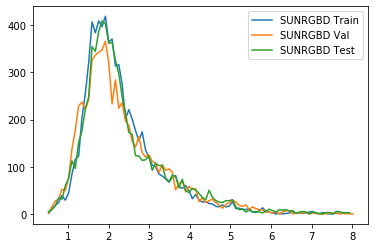

In [8]:
sun_depth_samples = sunrgbd_rgbd_dist_train['samples'][:, -1]
sun_depth_samples_train = sun_depth_samples[np.nonzero(sun_depth_samples)]

sun_depth_samples = sunrgbd_rgbd_dist_val['samples'][:, -1]
sun_depth_samples_val = sun_depth_samples[np.nonzero(sun_depth_samples)]

sun_depth_samples = sunrgbd_rgbd_dist_test['samples'][:, -1]
sun_depth_samples_test = sun_depth_samples[np.nonzero(sun_depth_samples)]

bins = np.linspace(-1,20, num=256)
plot_distribution([sun_depth_samples_train, 
                   sun_depth_samples_val,
                   sun_depth_samples_test], bins)
plt.legend(['SUNRGBD Train', 'SUNRGBD Val', 'SUNRGBD Test'])
plt.show()

In [9]:
print("SUNRGBD mean: {} \n \t std: {}".format(sunrgbd_rgbd_dist_train['mean'], 
                                                 sunrgbd_rgbd_dist_train['std']))

SUNRGBD mean: [131.9034    127.3675    123.2096      1.7978295] 
 	 std: [67.52947407 72.36730093 71.25469015  1.31356081]


## Cityscapes HHA vs RGB

Comparison between the histogram of the RGB values and the HHA values shows a very different data characteristics that hinder transfer learning

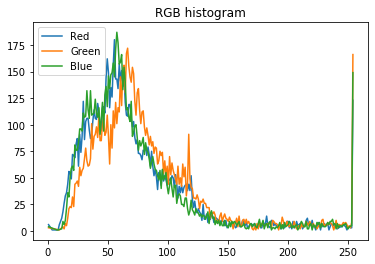

In [10]:
bins = np.linspace(0,255, num=256)
plot_distribution([city_rgbd_dist_train['samples'][:, 0],
                  city_rgbd_dist_train['samples'][:, 1],
                  city_rgbd_dist_train['samples'][:, 2]], bins)
plt.title("RGB histogram")
plt.legend(["Red", "Green", "Blue"])
plt.show()


In [11]:
city_hha_dist_train = sample_distribution(CityscapesSegmentation(city_hha, split='train'), n=100)
city_hha_dist_val = sample_distribution(CityscapesSegmentation(city_hha, split='val'), n=100)
city_hha_dist_test = sample_distribution(CityscapesSegmentation(city_hha, split='test'), n=100)

Using RGB HHA input


0it [00:00, ?it/s]

Found 2975 train images


100it [00:36,  2.75it/s]
0it [00:00, ?it/s]

Using RGB HHA input
Found 500 val images


100it [00:33,  2.98it/s]
0it [00:00, ?it/s]

Using RGB HHA input
Found 1525 test images


100it [00:35,  2.82it/s]


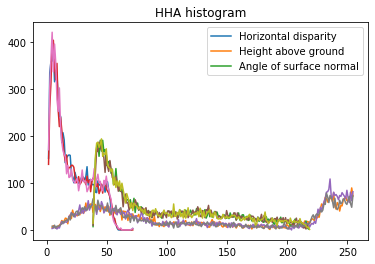

In [12]:
bins = np.linspace(0,255, num=256)

#Train
H1 = city_hha_dist_train['samples'][:,3]
H1_train = H1[np.nonzero(H1)]

H2 = city_hha_dist_train['samples'][:,4]
H2 = H2[np.nonzero(H2)]
H2_train = H2[H2<255]

A = city_hha_dist_train['samples'][:,5]
A_train = A[np.nonzero(A)]

# Val
H1 = city_hha_dist_val['samples'][:,3]
H1_val = H1[np.nonzero(H1)]

H2 = city_hha_dist_val['samples'][:,4]
H2 = H2[np.nonzero(H2)]
H2_val = H2[H2<255]

A = city_hha_dist_val['samples'][:,5]
A_val = A[np.nonzero(A)]

#Test
H1 = city_hha_dist_test['samples'][:,3]
H1_test = H1[np.nonzero(H1)]

H2 = city_hha_dist_test['samples'][:,4]
H2 = H2[np.nonzero(H2)]
H2_test = H2[H2<255]

A = city_hha_dist_test['samples'][:,5]
A_test = A[np.nonzero(A)]


plot_distribution([H1_train, H2_train, A_train,
                  H1_val, H2_val, A_val,
                  H1_test, H2_test, A_test], bins)
plt.title("HHA histogram")
plt.legend(["Horizontal disparity", "Height above ground", "Angle of surface normal"])
plt.show()


In [13]:
print("Cityscapes HHA mean: {} \n \t std: {}".format(city_hha_dist_train['mean'], 
                                                 city_hha_dist_train['std']))

Cityscapes HHA mean: [ 72.4705  82.0348  71.3593  16.6284 130.7181  77.4051] 
 	 std: [ 46.74012334  47.79347015  47.08756527  16.12074792 103.64109529
  57.88393382]


## COCO VNL Monocular Depth Estimation
COCO synthetic depth is generated using a model trained on NYUv2, a dataset of interior scenes. Therefore the estimated depths range between \[0, 12\] meters

In [14]:
coco_synth_dist_train = sample_distribution(COCOSegmentation(coco_synth, split='train'), n=100)
coco_synth_dist_val = sample_distribution(COCOSegmentation(coco_synth, split='val'), n=100)
#coco_synth_dist_test = sample_distribution(COCOSegmentation(coco_synth, split='test'), n=100)

loading annotations into memory...
Done (t=18.67s)
creating index...


0it [00:00, ?it/s]

index created!
Using RGB-D input


100it [00:11,  8.57it/s]


loading annotations into memory...


0it [00:00, ?it/s]

Done (t=0.59s)
creating index...
index created!
Using RGB-D input


100it [00:09, 10.96it/s]


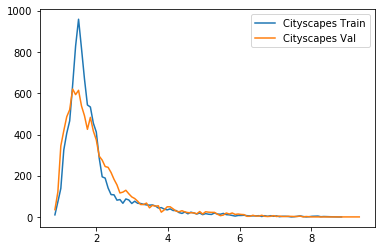

In [15]:
bins = np.linspace(-1,20, num=256)
plot_distribution([coco_synth_dist_train['samples'][:, -1], 
                   coco_synth_dist_val['samples'][:, -1]], bins)
                   #coco_synth_dist_test['samples'][:, -1]], bins)
plt.legend(['Cityscapes Train', 'Cityscapes Val', 'Cityscapes Test'])
plt.show()

In [16]:
print("COCO VNL mean: {} \n \t std: {}".format(coco_synth_dist_train['mean'], 
                                                 coco_synth_dist_train['std']))

COCO VNL mean: [123.1323     115.3294     103.4176       2.01030859] 
 	 std: [71.3194924  69.46267268 73.89141635  1.03503785]


## Cityscapes VNL Monocular Depth Estimation
Cityscapes synthetic depth is generated using a model trained on KITTI, a dataset for autonomous driving. Therefore the estimated depths range between \[0, 150\] meters

In [17]:
city_synth_dist_train = sample_distribution(CityscapesSegmentation(city_synth, split='train'), n=100)
city_synth_dist_val = sample_distribution(CityscapesSegmentation(city_synth, split='val'), n=100)
city_synth_dist_test = sample_distribution(CityscapesSegmentation(city_synth, split='test'), n=100)

Using RGB-D input


0it [00:00, ?it/s]

Found 2975 train images


100it [00:36,  2.72it/s]
0it [00:00, ?it/s]

Using RGB-D input
Found 500 val images


100it [00:36,  2.71it/s]


Using RGB-D input


0it [00:00, ?it/s]

Found 1525 test images


100it [00:42,  2.33it/s]


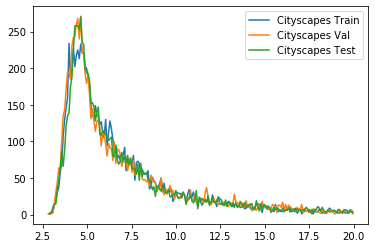

In [18]:
bins = np.linspace(-1,20, num=256)
plot_distribution([city_synth_dist_train['samples'][:, -1], 
                   city_synth_dist_val['samples'][:, -1],
                   city_synth_dist_test['samples'][:, -1]], bins)
plt.legend(['Cityscapes Train', 'Cityscapes Val', 'Cityscapes Test'])
plt.show()

## Comparison of estimated and target distributions
We use the synthetic depth to pretrain segmentation networks for smaller datasets with real depth. The COCO dataset is used to pretrain for segmenting the SUNRGBD dataset. And the Cityscapes dataset is used to experiment with synthetic pretraining on different dataset scales. 

In the following plot, we compare the distributions to show the differences between the pretraining and real depth measurements.

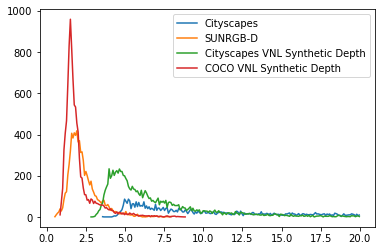

In [19]:
city_depth_samples = city_rgbd_dist_train['samples'][:, -1]
city_depth_samples = city_depth_samples[np.nonzero(city_depth_samples)]

city_synth_samples = city_synth_dist_train['samples'][:, -1]
city_synth_samples = city_synth_samples[np.nonzero(city_synth_samples)]

coco_depth_samples = coco_synth_dist_train['samples'][:, -1]
coco_depth_samples = coco_depth_samples[np.nonzero(coco_depth_samples)]

sun_depth_samples = sunrgbd_rgbd_dist_train['samples'][:, -1]
sun_depth_samples = sun_depth_samples[np.nonzero(sun_depth_samples)]
sun_depth_samples = sun_depth_samples[sun_depth_samples<255]

bins = np.linspace(-1,20, num=256)
plot_distribution([city_depth_samples, sun_depth_samples, 
                   city_synth_samples, coco_depth_samples], bins)
plt.legend(['Cityscapes', 'SUNRGB-D', 'Cityscapes VNL Synthetic Depth', 'COCO VNL Synthetic Depth'])
plt.show()

We normalize the datasets to zero mean and unit std.

In [20]:
def norm(samples, mean, std):
    return (samples - mean)/std

In [21]:
print("Cityscapes mean: {} \n \t std: {}".format(city_rgbd_dist_train['mean'], 
                                                 city_rgbd_dist_train['std']))
print("SUNRGBD mean: {} \n \t std: {}".format(sunrgbd_rgbd_dist_train['mean'], 
                                                 sunrgbd_rgbd_dist_train['std']))
print("Cityscapes VNL mean: {} \n \t std: {}".format(city_synth_dist_train['mean'], 
                                                 city_synth_dist_train['std']))
print("COCO VNL mean: {} \n \t std: {}".format(coco_synth_dist_train['mean'], 
                                                 coco_synth_dist_train['std']))

Cityscapes mean: [72.8352   82.6309   72.0542   26.777146] 
 	 std: [47.24967133 48.07478201 47.59000591 43.98546628]
SUNRGBD mean: [131.9034    127.3675    123.2096      1.7978295] 
 	 std: [67.52947407 72.36730093 71.25469015  1.31356081]
Cityscapes VNL mean: [73.8815     83.5587     73.127       7.52289023] 
 	 std: [49.99663446 50.59685321 50.10857083  5.10755077]
COCO VNL mean: [123.1323     115.3294     103.4176       2.01030859] 
 	 std: [71.3194924  69.46267268 73.89141635  1.03503785]


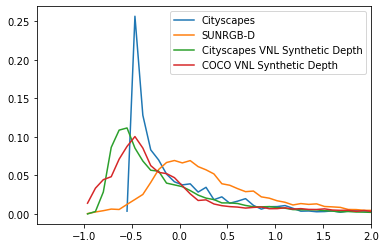

In [22]:
city_depth_samples = city_rgbd_dist_train['samples'][:, -1]
city_depth_samples = norm(city_depth_samples[np.nonzero(city_depth_samples)], 
                          city_rgbd_dist_train['mean'][-1], city_rgbd_dist_train['std'][-1])

city_synth_samples = city_synth_dist_train['samples'][:, -1]
city_synth_samples = norm(city_synth_samples[np.nonzero(city_synth_samples)], 
                          city_synth_dist_train['mean'][-1], city_synth_dist_train['std'][-1])

coco_depth_samples = coco_synth_dist_train['samples'][:, -1]
coco_depth_samples = norm(coco_depth_samples[np.nonzero(coco_depth_samples)], 
                          coco_synth_dist_train['mean'][-1], coco_synth_dist_train['std'][-1])

sun_depth_samples = sunrgbd_rgbd_dist_train['samples'][:, -1]
sun_depth_samples = sun_depth_samples[np.nonzero(sun_depth_samples)]
sun_depth_samples = norm(sun_depth_samples[sun_depth_samples<255], 
                         sunrgbd_rgbd_dist_train['mean'][-1], sunrgbd_rgbd_dist_train['std'][-1])

bins = np.linspace(-1,20, num=256)
plot_distribution([city_depth_samples, sun_depth_samples, 
                   city_synth_samples, coco_depth_samples], bins, percent=True)
plt.legend(['Cityscapes', 'SUNRGB-D', 'Cityscapes VNL Synthetic Depth', 'COCO VNL Synthetic Depth'])
plt.xlim(right=2)
plt.show()

## Experiments with Box Cox

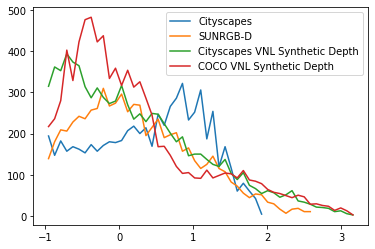

In [23]:
import scipy.stats

city_depth_samples = city_rgbd_dist_train['samples'][:, -1]
city_depth_samples_cox = scipy.stats.boxcox(city_depth_samples[np.nonzero(city_depth_samples)], -0.5)
city_depth_samples_cox = norm(city_depth_samples_cox, np.mean(city_depth_samples_cox), np.std(city_depth_samples_cox))


city_synth_samples = city_synth_dist_train['samples'][:, -1]
city_synth_samples_cox = scipy.stats.boxcox(city_synth_samples[np.nonzero(city_synth_samples)], -0.5)
city_synth_samples_cox = norm(city_synth_samples_cox, np.mean(city_synth_samples_cox), np.std(city_synth_samples_cox))


coco_depth_samples = coco_synth_dist_train['samples'][:, -1]
coco_depth_samples_cox = scipy.stats.boxcox(coco_depth_samples[np.nonzero(coco_depth_samples)], -0.5)
coco_depth_samples_cox = norm(coco_depth_samples_cox, np.mean(coco_depth_samples_cox), np.std(coco_depth_samples_cox))


sun_depth_samples = sunrgbd_rgbd_dist_train['samples'][:, -1]
sun_depth_samples_cox = scipy.stats.boxcox(sun_depth_samples[np.nonzero(sun_depth_samples)], -0.5)
sun_depth_samples_cox = norm(sun_depth_samples_cox, np.mean(sun_depth_samples_cox), np.std(sun_depth_samples_cox))


bins = np.linspace(-1,20, num=256)
plot_distribution([city_depth_samples_cox, sun_depth_samples_cox, 
                   city_synth_samples_cox, coco_depth_samples_cox], bins)
plt.legend(['Cityscapes', 'SUNRGB-D', 'Cityscapes VNL Synthetic Depth', 'COCO VNL Synthetic Depth'])
plt.show()